# Lab 5

In [1]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M  100  879M    0     0  38.3M      0  0:00:22  0:00:22 --:--:-- 41.5M0     0  48.3M      0  0:00:18  0:00:02  0:00:16 48.4M


In [5]:
!gunzip SUSY.csv.gz

SUSY.csv already exists -- do you wish to overwrite (y or n)? ^C


In [4]:
ls -lh

total 6481344
-rw-r--r--  1 alyssajuarez  staff   478K Mar 23 15:45 Lab 5.ipynb
-rw-r--r--  1 alyssajuarez  staff   2.2G Mar 21 16:08 SUSY.csv
-rw-r--r--  1 alyssajuarez  staff   880M Mar 23 15:46 SUSY.csv.gz


In [26]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

In [27]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

In [28]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [29]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [30]:
FeatureNames

['axial_MET',
 'MET_rel',
 'dPhi_r_b',
 'cos_theta_r1',
 'MT2',
 'M_TR_2',
 'S_R',
 'M_R',
 'M_Delta_R',
 'R']

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df = pd.read_csv(filename, dtype='float64', names=VarNames)
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


In [33]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

# Part 3

l_1_pT


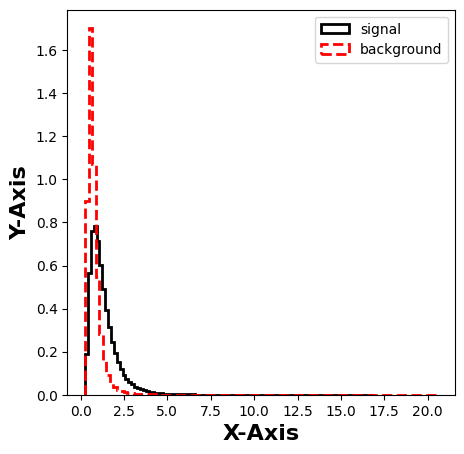

l_1_eta


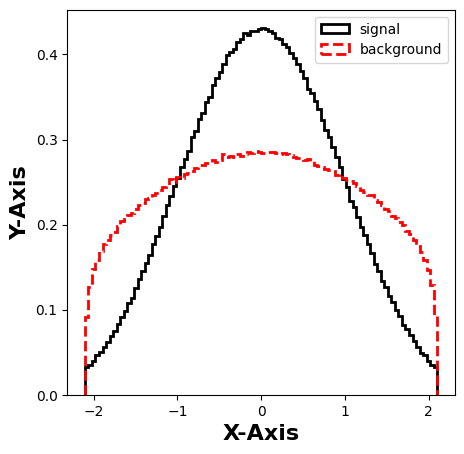

l_1_phi


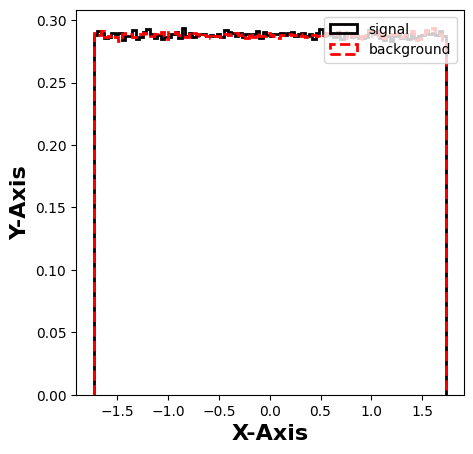

l_2_pT


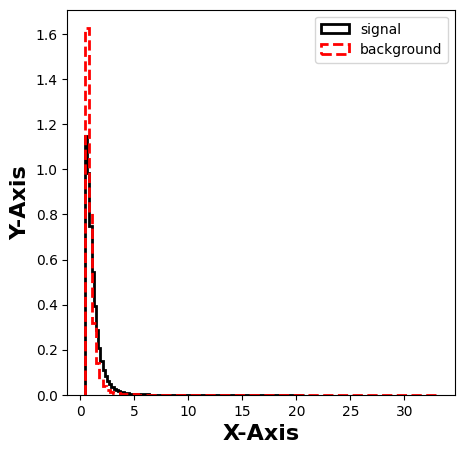

l_2_eta


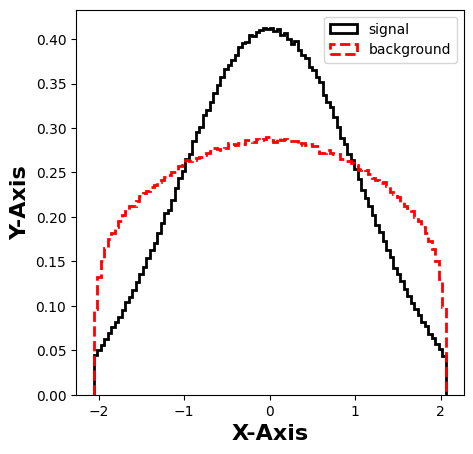

l_2_phi


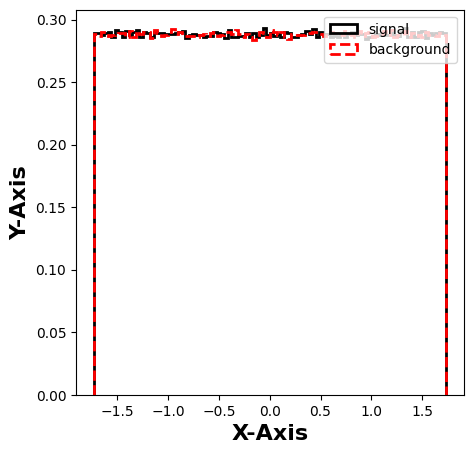

MET


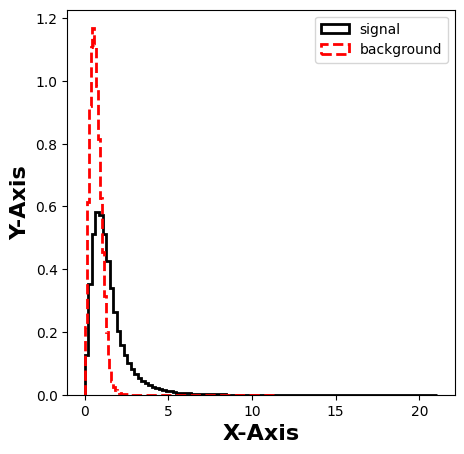

MET_phi


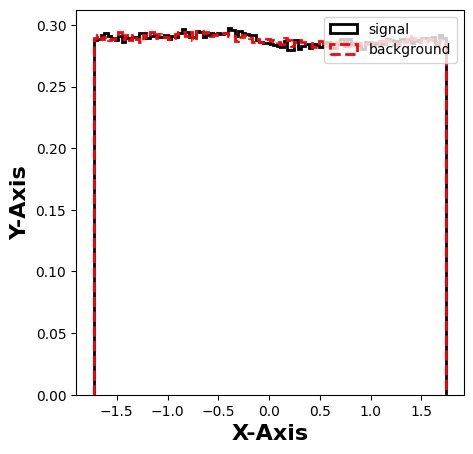

MET_rel


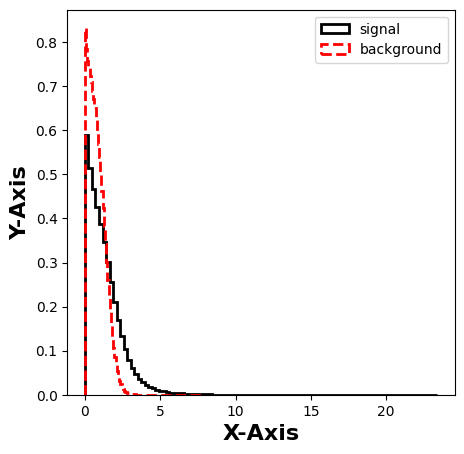

axial_MET


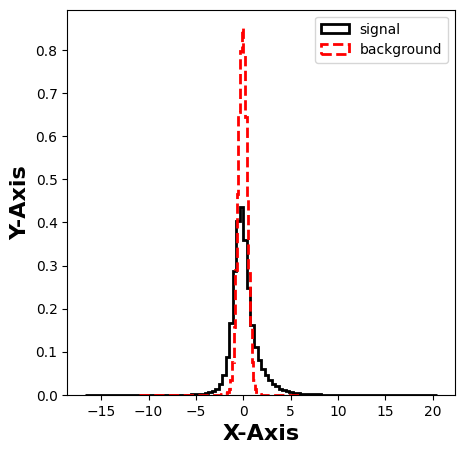

M_R


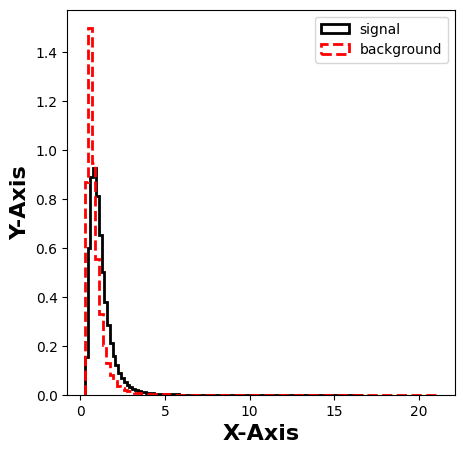

M_TR_2


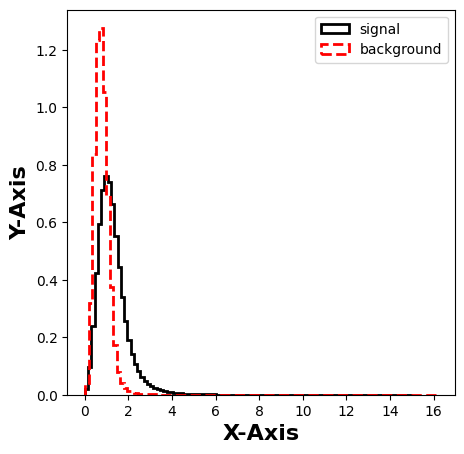

R


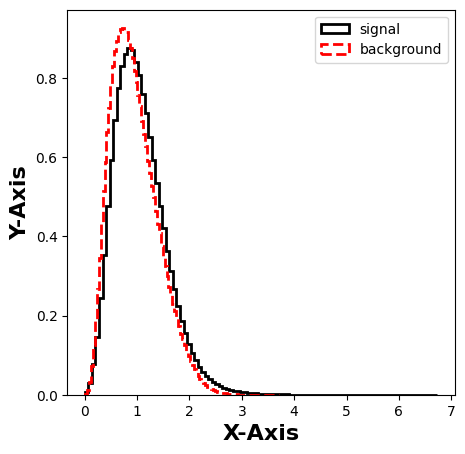

MT2


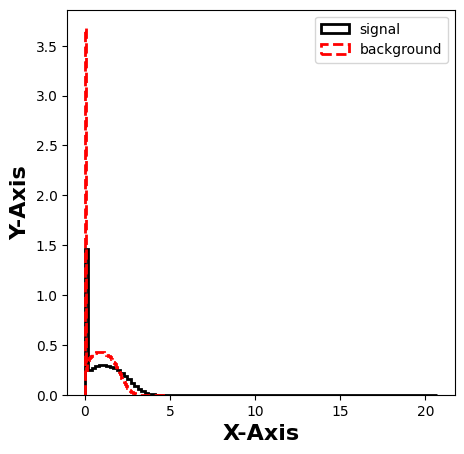

S_R


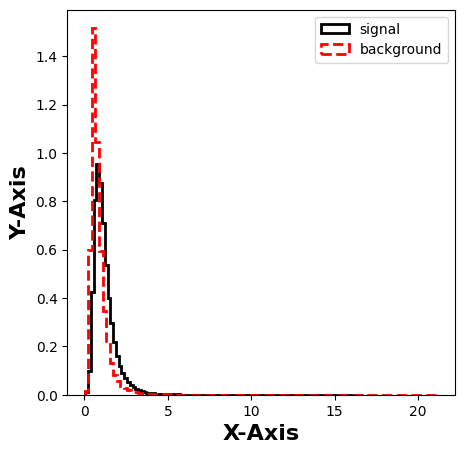

M_Delta_R


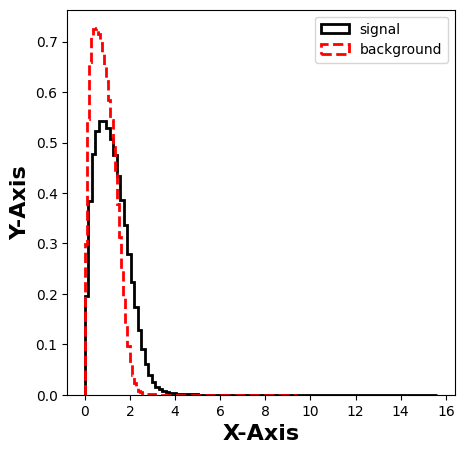

dPhi_r_b


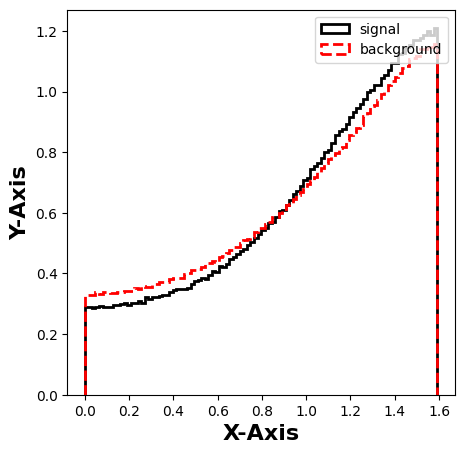

cos_theta_r1


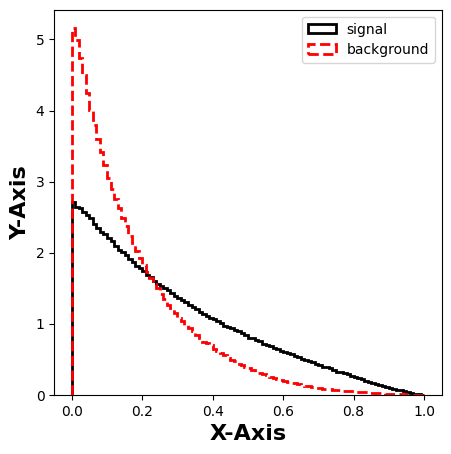

In [34]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(5,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="black", linewidth = 2, label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="red", linewidth = 2, linestyle = 'dashed', label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.xlabel('X-Axis',fontsize=16, fontweight = 'bold')
    plt.ylabel('Y-Axis', fontsize=16, fontweight = 'bold')
    plt.show()
    
    

# Part 4

## A

In [35]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


In [36]:
d = pd.read_csv("training.zip")
d
data = d.drop(["EventId"], axis=1)
data

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [37]:
data.replace(('s', 'b'), (1, 0), inplace=True)
data

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,0
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,0
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,0
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,0
249996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,0
249997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,1
249998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,0


In [38]:
data.shape

(250000, 32)

In [39]:
def compare_distributions(df,column_name,selections,**kwargs):
    for label,selection in selections.items():        
        _=plt.hist(df[selection][column_name],label=label,stacked=True,**kwargs)
        #plt.show()

    _=plt.legend()

signal


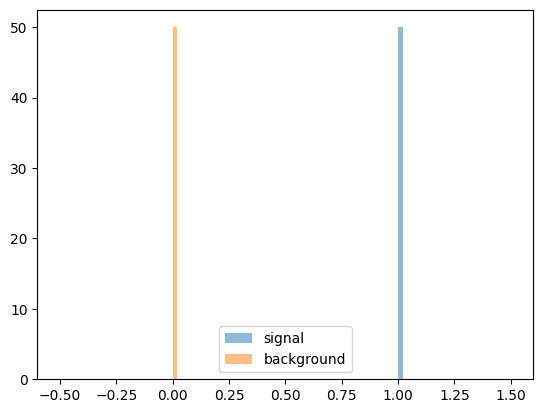

l_1_pT


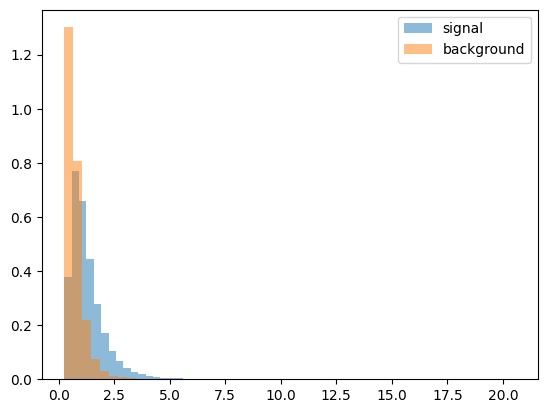

l_1_eta


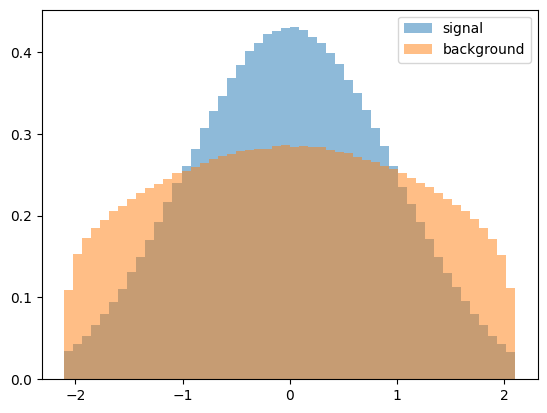

l_1_phi


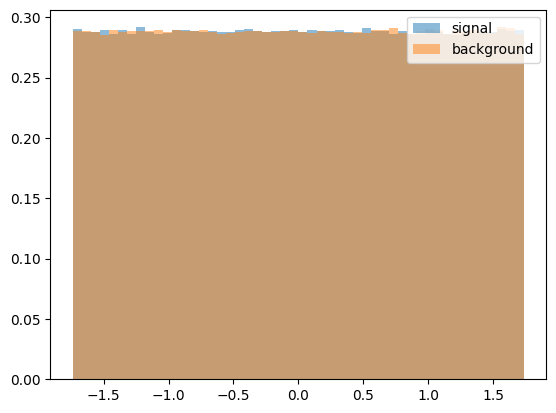

l_2_pT


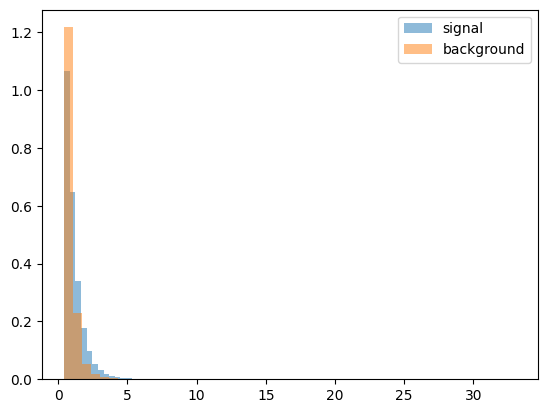

l_2_eta


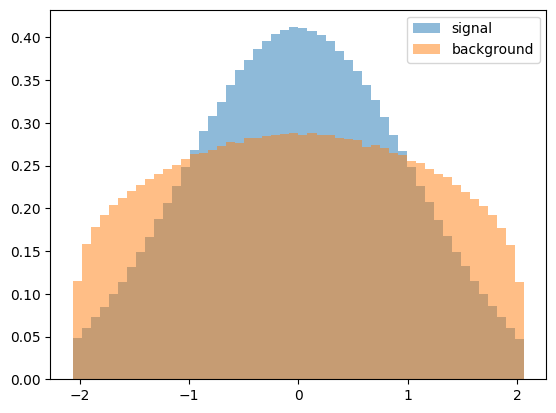

l_2_phi


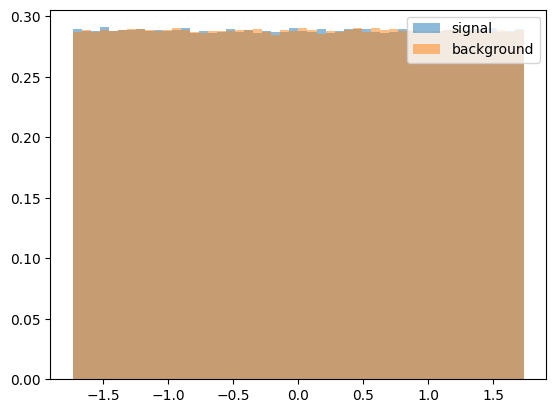

MET


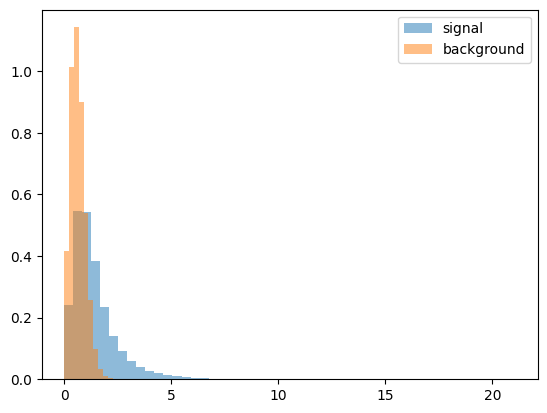

MET_phi


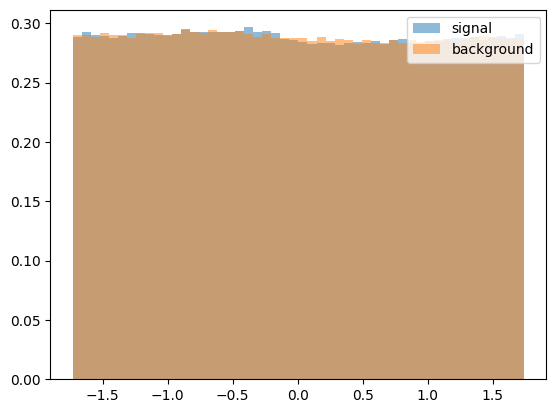

MET_rel


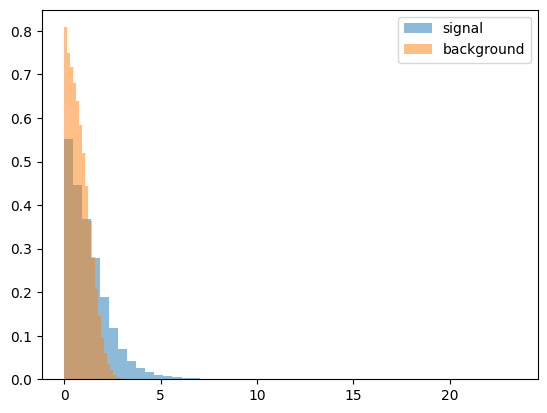

axial_MET


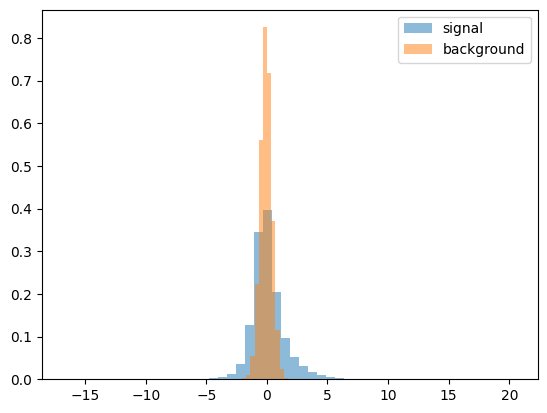

M_R


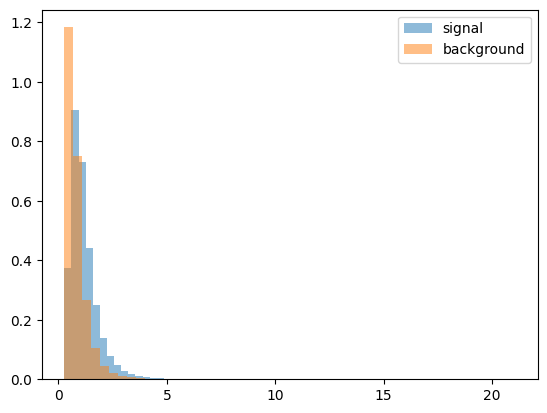

M_TR_2


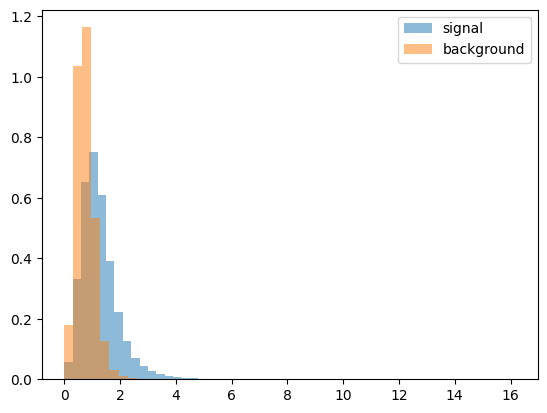

R


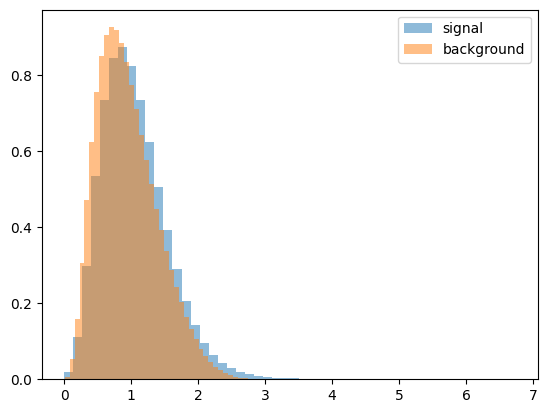

MT2


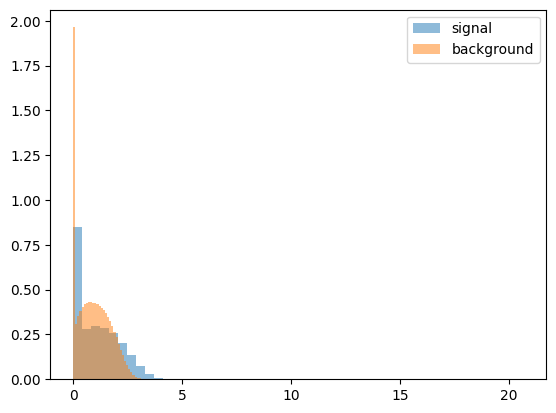

S_R


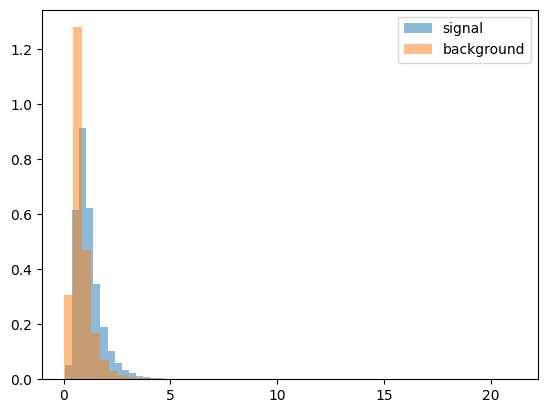

M_Delta_R


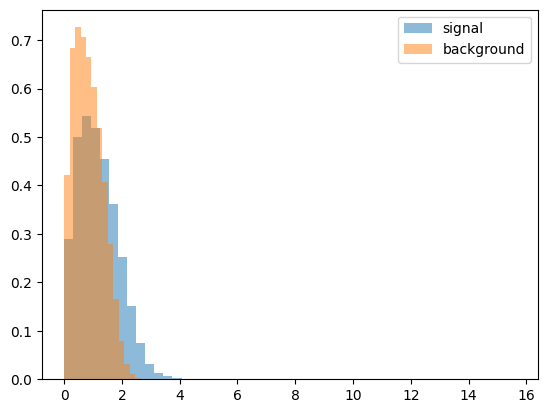

dPhi_r_b


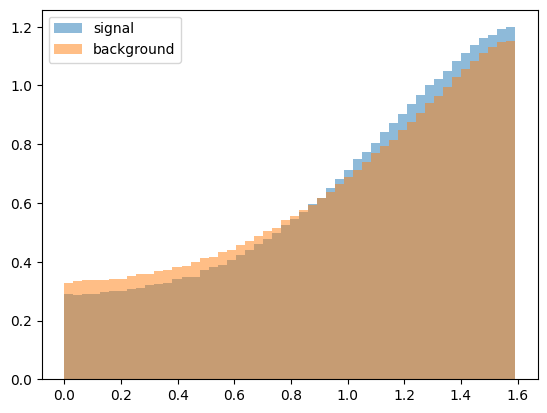

cos_theta_r1


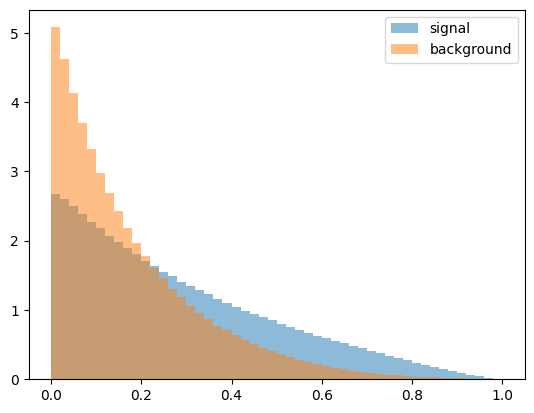

In [40]:
selection_dict={"signal":df["signal"]==1.,"background":df["signal"]!=1}

for column_name in df.columns:
    print(column_name)
    
    compare_distributions(df,column_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=50,
                     )
    plt.show()

DER_mass_MMC


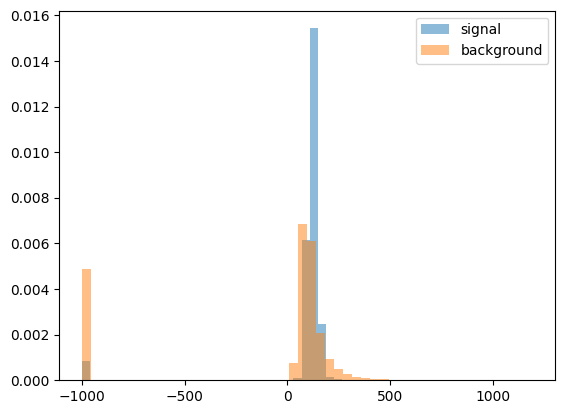

DER_mass_transverse_met_lep


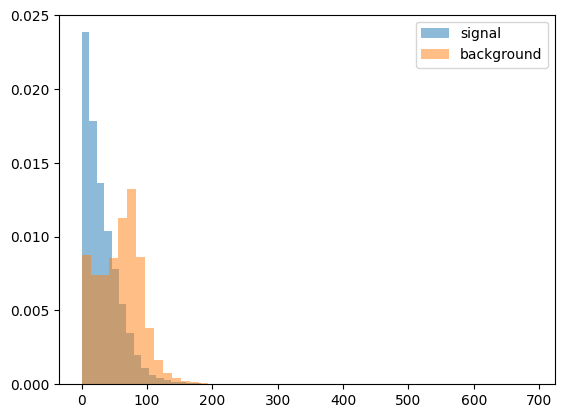

DER_mass_vis


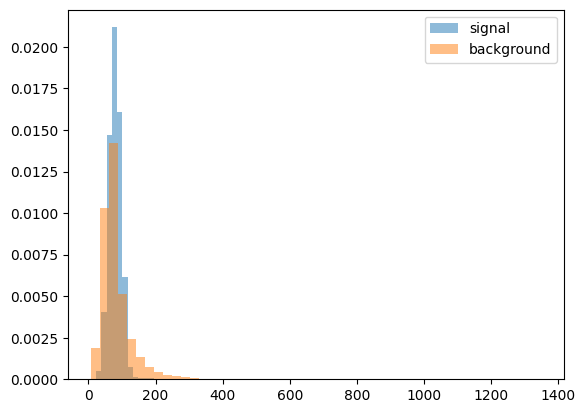

DER_pt_h


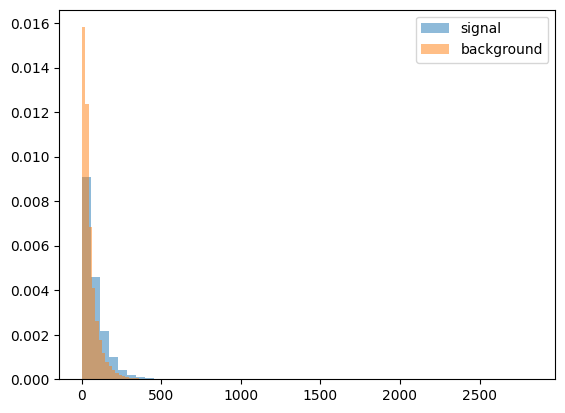

DER_deltaeta_jet_jet


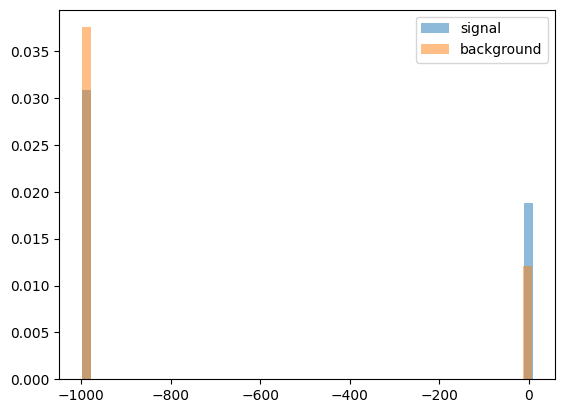

DER_mass_jet_jet


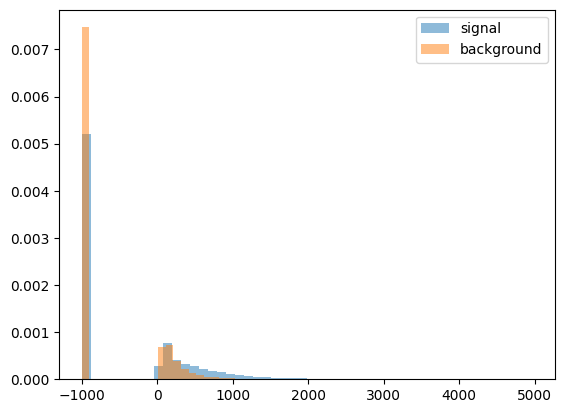

DER_prodeta_jet_jet


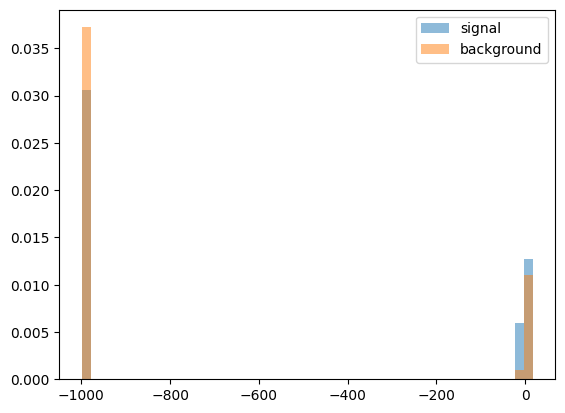

DER_deltar_tau_lep


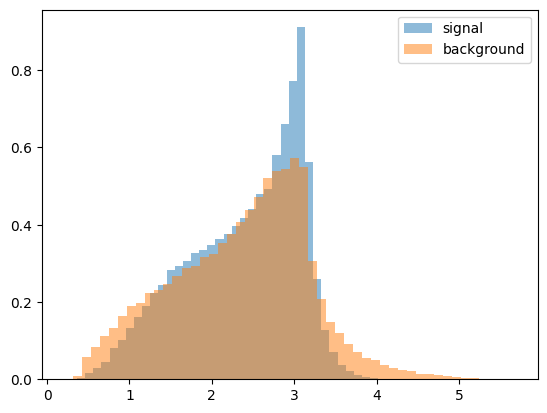

DER_pt_tot


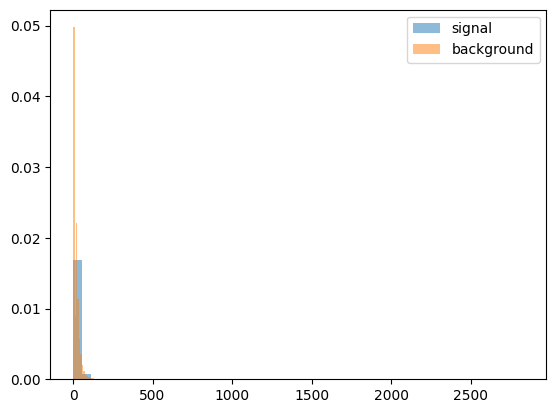

DER_sum_pt


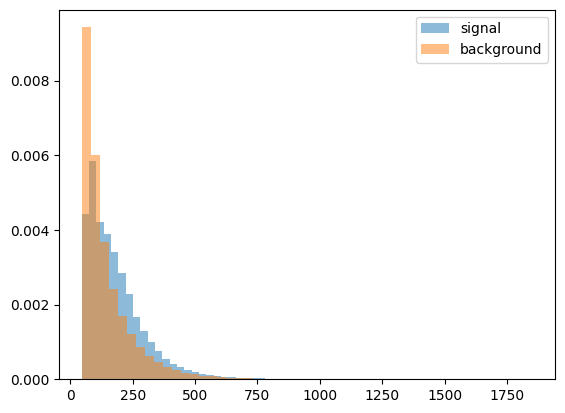

DER_pt_ratio_lep_tau


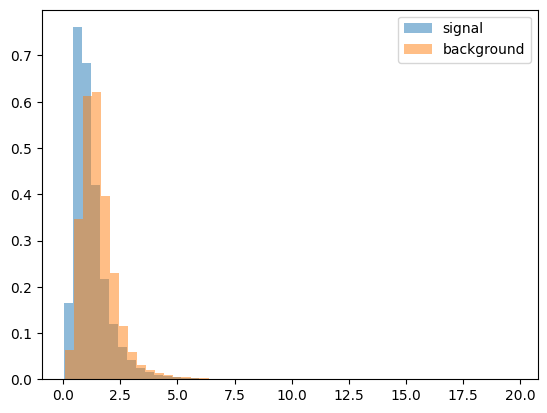

DER_met_phi_centrality


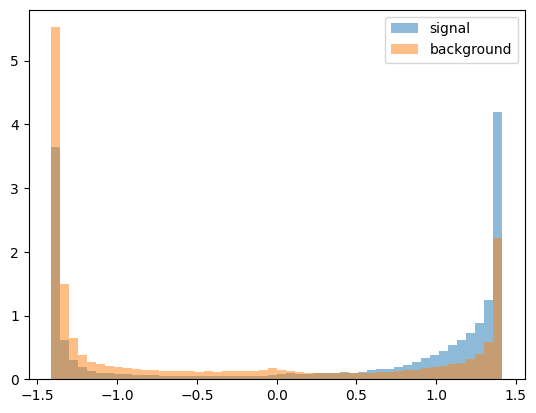

DER_lep_eta_centrality


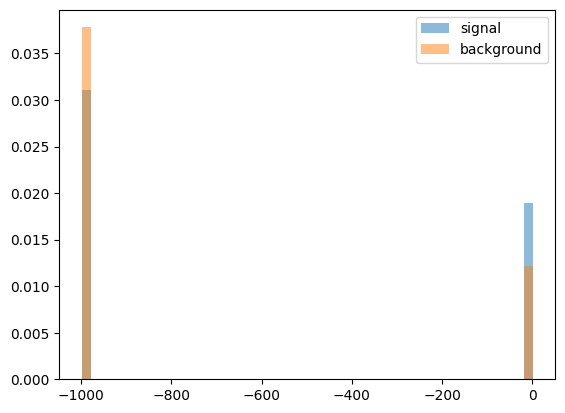

PRI_tau_pt


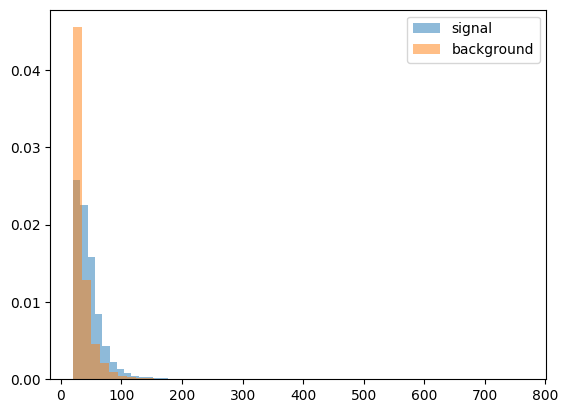

PRI_tau_eta


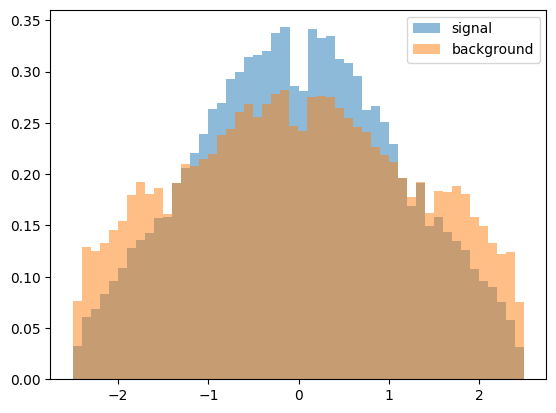

PRI_tau_phi


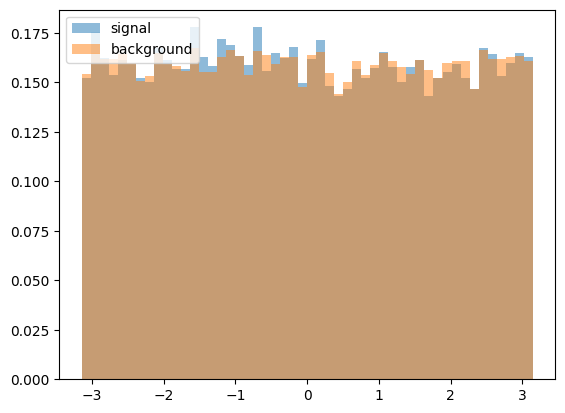

PRI_lep_pt


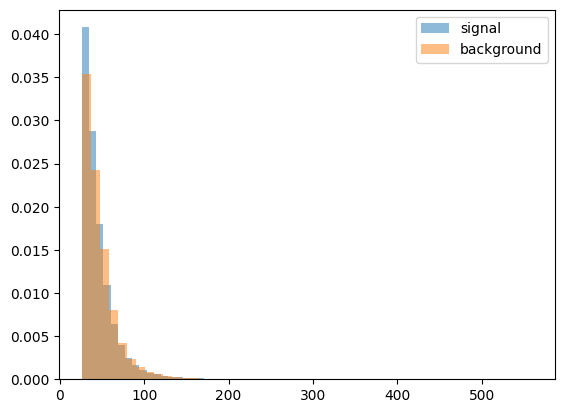

PRI_lep_eta


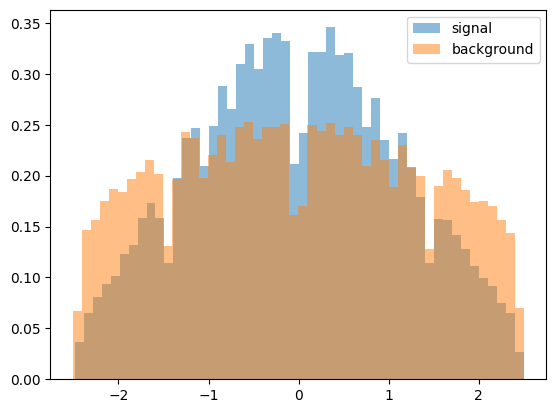

PRI_lep_phi


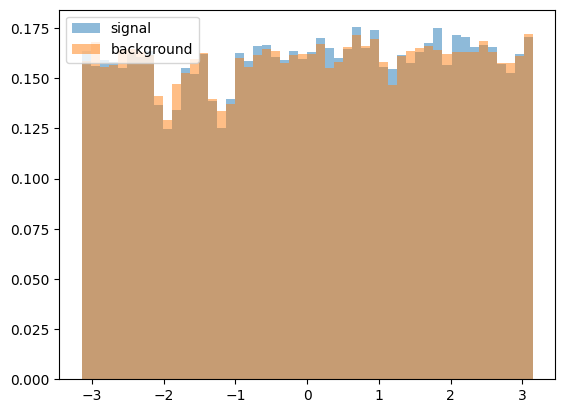

PRI_met


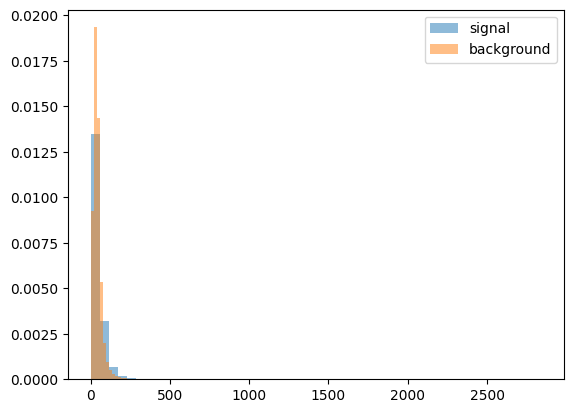

PRI_met_phi


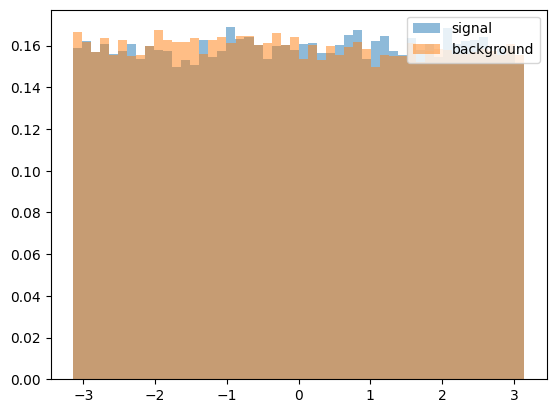

PRI_met_sumet


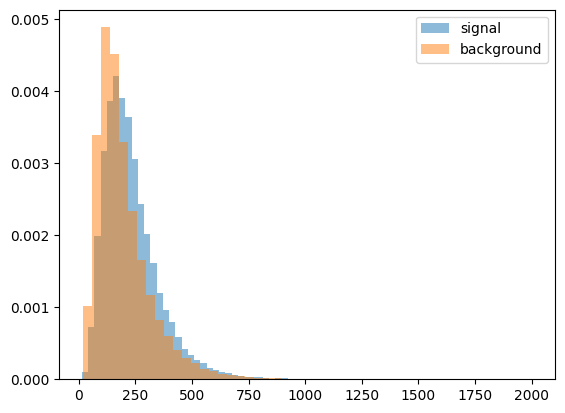

PRI_jet_num


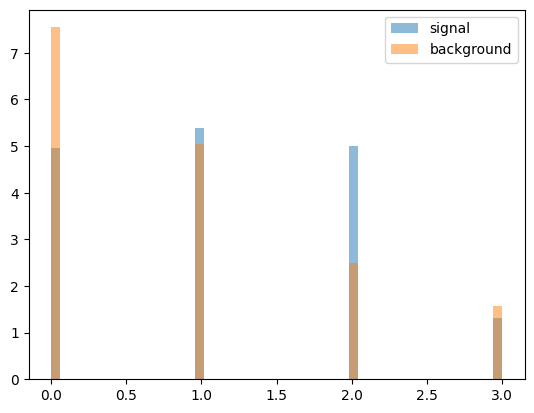

PRI_jet_leading_pt


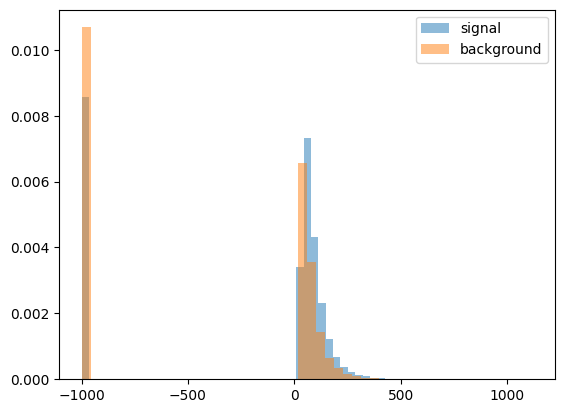

PRI_jet_leading_eta


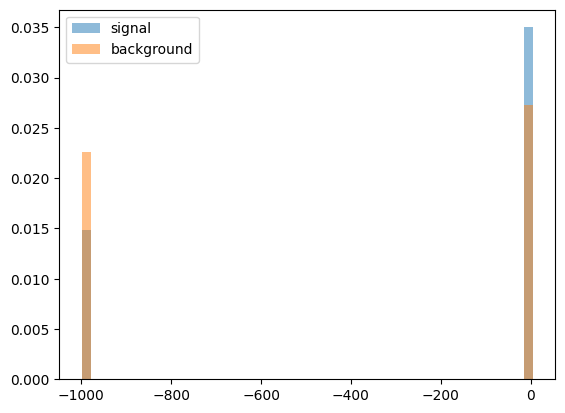

PRI_jet_leading_phi


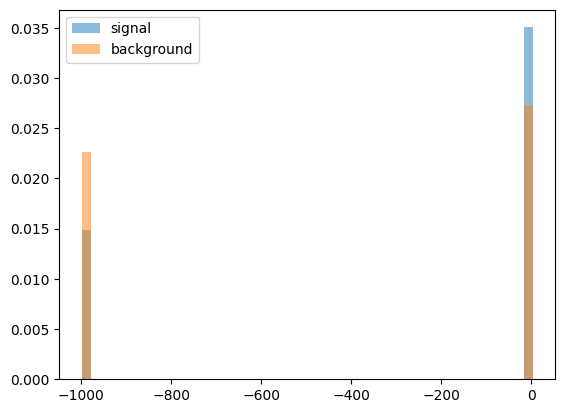

PRI_jet_subleading_pt


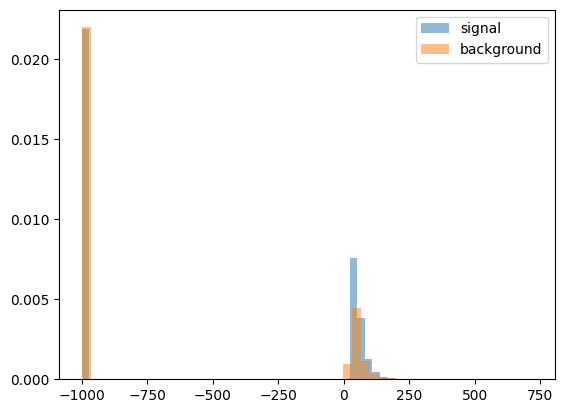

PRI_jet_subleading_eta


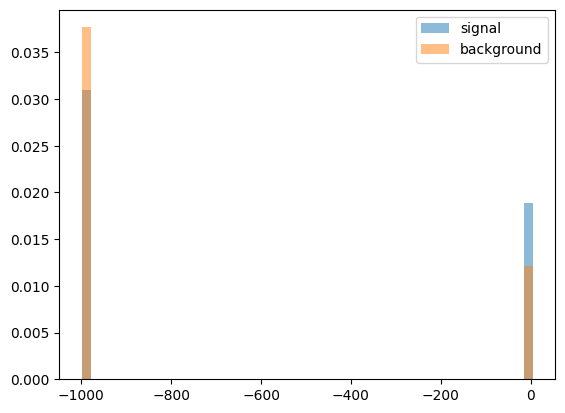

PRI_jet_subleading_phi


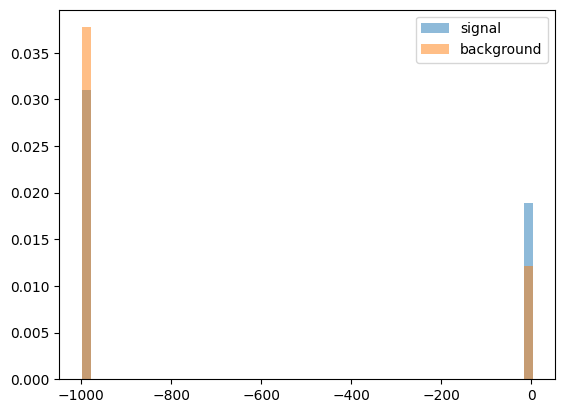

PRI_jet_all_pt


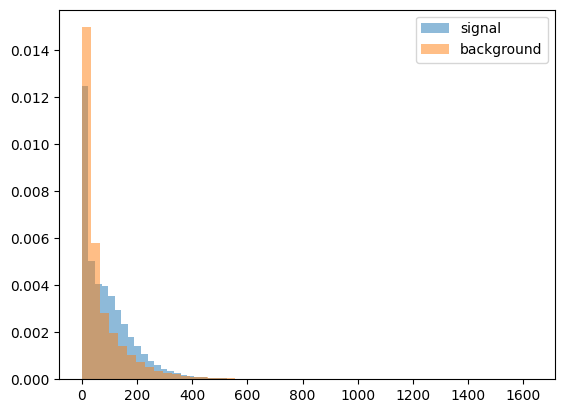

Weight


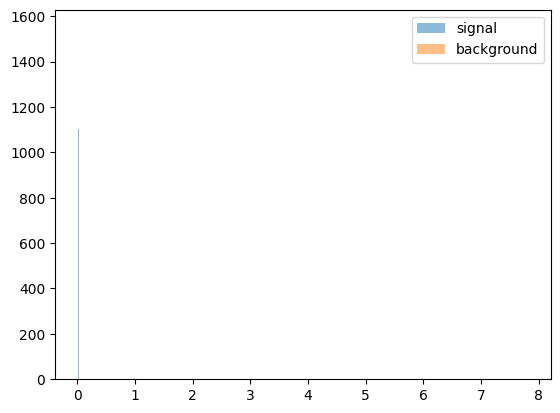

Label


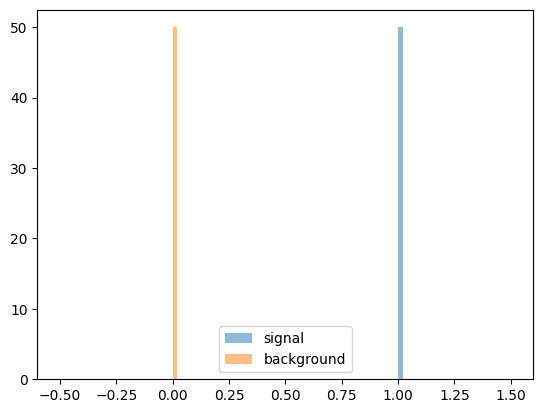

In [45]:
selection_dict={"signal":data["Label"]==1,"background":data["Label"]!=1}

for column_name in data.columns:
    print(column_name)
    compare_distributions(data,column_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=50,
                     )
    plt.show()

## Part 1.B
I'm not entirely sure if i performed this correctly, as it lopped through the data pretty fast for me. One thing to speed up the process would be to eliminate any unneeded columns, thus reducing the amount of times needed to loop through the findings. Another option would be to select a random sample so we arent runnign through a quarter of a million instances every loop

In [46]:
def compare_distributions(df,column_name,selections,**kwargs):
    for label,selection in selections.items():        
        _=plt.hist(df[selection][column_name],label=label,stacked=True,**kwargs)
        #plt.show()

    _=plt.legend()

## Part 1.C
* SUSY: 1_eta, MET and cos_theta_r1
* HIGGS: DER_mass_transverse_met_lep, weight

## Part 4.2

## Part 2.A
I already have tabulate installed

## Part2.B

In [47]:
x = df.cov()

In [48]:
y = df.corr()

In [55]:
a= data.cov()

In [58]:
b= data.corr()
print(b)

                             DER_mass_MMC  DER_mass_transverse_met_lep  \
DER_mass_MMC                     1.000000                    -0.455755   
DER_mass_transverse_met_lep     -0.455755                     1.000000   
DER_mass_vis                     0.168548                     0.190109   
DER_pt_h                         0.198765                    -0.249116   
DER_deltaeta_jet_jet             0.162661                    -0.176386   
DER_mass_jet_jet                 0.160524                    -0.190392   
DER_prodeta_jet_jet              0.162521                    -0.175942   
DER_deltar_tau_lep               0.228105                     0.043251   
DER_pt_tot                       0.045826                     0.017758   
DER_sum_pt                       0.201464                    -0.146837   
DER_pt_ratio_lep_tau            -0.017073                     0.349504   
DER_met_phi_centrality           0.358963                    -0.419757   
DER_lep_eta_centrality           0.162

## Part 2.C

In [51]:
from IPython.display import HTML, display
from tabulate import tabulate

In [60]:
print(tabulate(x, tablefmt = "plain", showindex = 'always'))

signal         0.248199      0.132655     -0.000163839  -0.000230407   0.0634893     0.000189843  -4.93688e-05   0.19083       5.47176e-05   0.125406      0.0384611     0.0835192     0.123103      0.0262571     0.033998      0.0798843     0.0848346     0.00709482    0.0263767
l_1_pT         0.132655      0.472428     -0.000262667  -0.000229061   0.307887     -0.000302457   0.000227164   0.230951     -0.000676375   0.0985665    -0.0125117     0.368085      0.290831     -0.0592849    -0.0127782     0.346283      0.0980831    -0.0470231     0.0225171
l_1_eta       -0.000163839  -0.000262667   1.00622       0.0003216    -0.000377896   0.405877      0.000297084  -0.000557684  -0.000540624  -0.000496646  -0.000497512  -0.000308117  -0.0002659     0.000127738  -0.000157618  -0.000281414  -0.000504145   7.96493e-05   0.000145749
l_1_phi       -0.000230407  -0.000229061   0.0003216     1.00334      -0.000128547   0.000641116  -0.26813       0.00120012   -0.184184      0.00152891   -0.00196469  

## Part 2.D

In [67]:
def table(data):
    x = data.cov()
    y = data.corr()
    
    #Tables 
    print("Covariance Table")
    print(tabulate(x, tablefmt = "plain"))
    print("Correlation Table")
    print(tabulate(y, tablefmt = "plain"))
    

In [65]:
table(data)

Covariance Table
DER_mass_MMC                 165117         -6545.66        2796.31       5141.29       30039.6         42918.3        29917.3          72.5675        414.758       9472.19      -5.8603       174.1           29974.2        1197.54         1.27236      -4.55995       891.619        5.17105      -0.549568     -3124.09        5.4572      11410.6        87.8061        54176.1        49130.2       49128.7         31752.2          29958.5         29957.9         7383.03      -249.34        46.1205
DER_mass_transverse_met_lep   -6545.66       1249.26         274.344      -560.487      -2833.39        -4427.75       -2817.17          1.19685        13.9797      -600.506     10.4352       -17.7084        -2825.89       -115.23        -0.0905077     0.0726948     242.268       -0.303007      0.0218519      213.6        -1.02006      -750.3        -7.27343       -4326.49       -3811.43      -3811.13        -2999.36         -2824.07        -2824.01        -727.545       27.8253   